# Problem Statement 

# Importing Libaries 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings

# Data Garthing

In [33]:
df = pd.read_excel("smev_data.xlsx", sheet_name=None)

In [34]:
df.keys()

dict_keys(['EV 2W FY 19-20', 'EV 2W FY 20-21', 'EV 2W FY 21-22', 'EV 2W FY 22-23', 'EV Market', 'Electric Bus Sales', 'Electric 4-Wheeler Sales', 'Electric 3-Wheeler Sales', 'Electric 2-Wheeler Sales', 'EV Industries'])

In [35]:
df['EV Industries']

,category,financial_year,num_vehicles
0,E-2 Wheelers,2017-18,1981
1,E-2 Wheelers,2018-19,27478
2,E-2 Wheelers,2019-20,26512
3,E-2 Wheelers,2020-21,44294
4,E-2 Wheelers,2021-22,249615
5,E-2 Wheelers,2022-23,728090
6,E-3 Wheelers,2017-18,91970
7,E-3 Wheelers,2018-19,116031
8,E-3 Wheelers,2019-20,143051
9,E-3 Wheelers,2020-21,90898


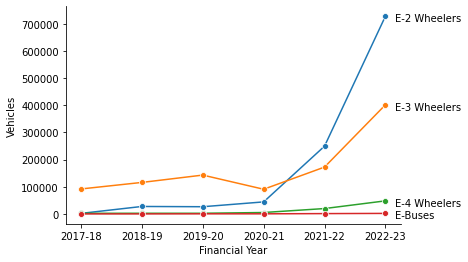

In [36]:
fig, ax = plt.subplots(figsize=(6, 4))
ax = sns.lineplot(data=df['EV Industries'], x='financial_year', y='num_vehicles', hue='category', marker='o', palette='tab10')
plt.xlabel("Financial Year")
plt.ylabel("Vehicles")
plt.legend(title='Category')

# Annotate the last data point
for col in df['EV Industries']['category'].unique():
    last_point = df['EV Industries'][df['EV Industries']['category'] == col].iloc[-1]
    plt.annotate(f"{last_point['category']}", 
                 (last_point['financial_year'], last_point['num_vehicles']),
                 textcoords="offset points",
                 xytext=(10, -5), 
                 ha='left')
ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().set_visible(False)
plt.show()


In [37]:
df['EV Market'] = df['EV Market'].sort_values('Amount INR Cr', ascending = False)

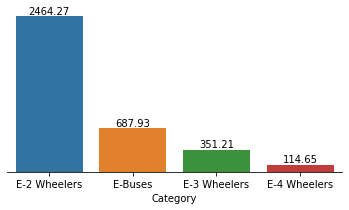

In [38]:
fig, ax = plt.subplots(figsize = (6, 3))
ax = sns.barplot(df['EV Market'], x = 'Category', y = 'Amount INR Cr')
ax.bar_label(ax.containers[0])
plt.yticks([])
plt.ylabel("")
ax.spines[['right', 'top', 'left']].set_visible(False)
plt.show()

In [42]:
ev2w = list(data_smev.keys())[0:4]
data = pd.concat([data_smev[ev2w[0]], data_smev[ev2w[1]], data_smev[ev2w[2]], data_smev[ev2w[3]]])

In [43]:
data

,financial_year,maker,market_share,month,num_vehicles
0,2019-20,Hero Electric,0.30,Apr,1776
1,2019-20,Hero Electric,0.30,May,455
2,2019-20,Hero Electric,0.30,Jun,329
3,2019-20,Hero Electric,0.30,Jul,260
4,2019-20,Hero Electric,0.30,Aug,249
...,...,...,...,...,...
151,2022-23,OTHERS,0.08,Nov,5241
152,2022-23,OTHERS,0.08,Dec,5233
153,2022-23,OTHERS,0.08,Jan,5111
154,2022-23,OTHERS,0.08,Feb,5083


In [45]:
data['maker'] = data['maker'].str.upper()

In [46]:
np.sort(data['maker'].unique())

array(['AMPERE', 'AMPERE VEHICLES', 'ATHER', 'ATHER ENERGY', 'BAJAJ',
       'BEING INDIA', 'BENLING', 'HERO ELECTRIC', 'JITENDRA',
       'JITENDRA NEW EV', 'OKAYA EV', 'OKINAWA', 'OKINAWA AUTOTECH',
       'OLA ELECTRIC', 'OTHERS', 'PURE EV', 'REVOLT', 'TVS'], dtype=object)

In [47]:
data['maker'] = data_ev2w['maker'].replace('AMPERE VEHICLES', 'AMPERE').replace('ATHER ENERGY', 'ATHER').replace('BEING INDIA', 'BENLING').replace('JITENDRA NEW EV', 'JITENDRA').replace('OKINAWA AUTOTECH', 'OKINAWA')

In [48]:
np.sort(data['maker'].unique())

array(['AMPERE', 'ATHER', 'BAJAJ', 'BENLING', 'HERO ELECTRIC', 'JITENDRA',
       'OKAYA EV', 'OKINAWA', 'OLA ELECTRIC', 'OTHERS', 'PURE EV',
       'REVOLT', 'TVS'], dtype=object)

In [49]:
data

,financial_year,maker,market_share,month,num_vehicles
0,2019-20,HERO ELECTRIC,0.30,Apr,1776
1,2019-20,HERO ELECTRIC,0.30,May,455
2,2019-20,HERO ELECTRIC,0.30,Jun,329
3,2019-20,HERO ELECTRIC,0.30,Jul,260
4,2019-20,HERO ELECTRIC,0.30,Aug,249
...,...,...,...,...,...
151,2022-23,OTHERS,0.08,Nov,5241
152,2022-23,OTHERS,0.08,Dec,5233
153,2022-23,OTHERS,0.08,Jan,5111
154,2022-23,OTHERS,0.08,Feb,5083


In [50]:
data_year = data.groupby(['financial_year', 'maker']).agg({'num_vehicles':'sum'}).reset_index()

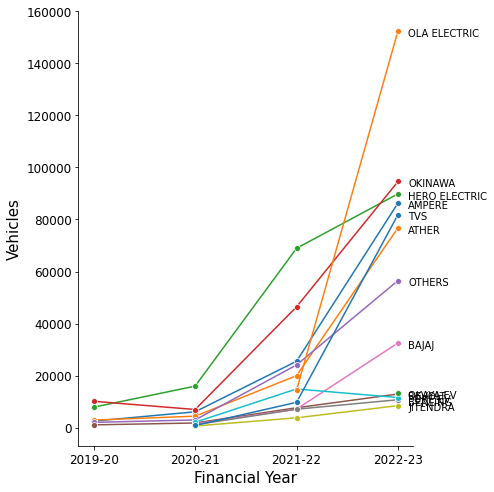

In [51]:
fig, ax = plt.subplots(figsize=(6,8))
ax = sns.lineplot(data=data_year, x='financial_year', y='num_vehicles', hue='maker', marker='o', palette='tab10')
plt.xlabel("Financial Year", fontsize = 15)
plt.ylabel("Vehicles", fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.legend(title='Maker')

# Annotate the last data point
for col in data_year['maker'].unique()[::1]:
    last_point = data_year[data_year['maker'] == col].iloc[-1]
    plt.annotate(f"{last_point['maker']}", 
                 (last_point['financial_year'], last_point['num_vehicles']),
                 textcoords="offset points",
                 xytext=(10, -5), 
                 ha='left')
ax.spines[['right', 'top']].set_visible(False)
ax.get_legend().set_visible(False)
plt.savefig('ev_2w.png', format = 'png')
plt.show()

# EV Market Segmentation

In [52]:
df1 = pd.read_csv("ev2_bikewale.csv")
data_model = pd.read_csv("ev_model_spec.csv")

In [53]:
df1.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube


In [54]:
data_model.head()

,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,Ampere Magnus EX,104758,121,53,90,7,1200
1,Ampere Magnus Pro,66053,45,25,94,10,250
2,Ampere REO,61993,45,25,88,10,250
3,Ampere Zeal,96544,120,53,80,7,1200
4,Ather 450X,135489,111,90,108,8,3000


In [56]:
data1 = df1.merge(data_model, how = 'left', on = 'Model Name')

In [57]:
data1

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W)
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,TVS iQube,137890,100,78,117,5,3000
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,TVS iQube,137890,100,78,117,5,3000
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,TVS iQube,137890,100,78,117,5,3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,Scooty is ok but 250 motor power is less. So t...,Daily Commute,> 1 yr,< 5000 kms,2,2.0,2.0,NaN,2.0,NaN,2.0,NaN,3.0,Gemopai Ryder,70821,90,25,80,4,250
840,"Superb scooty. good look, Many color options ....",Everything,< 3 months,< 5000 kms,5,5.0,5.0,5.0,5.0,5.0,NaN,5.0,NaN,Gemopai Ryder,70821,90,25,80,4,250
841,"Up to 2 years the condition was good,\nAfter 2...",Daily Commute,> 1 yr,5000-10000 kms,2,2.0,2.0,4.0,2.0,3.0,NaN,1.0,NaN,Gemopai Ryder,70821,90,25,80,4,250
842,"Compare to other scooters it is a best bike, c...",Daily Commute,3-6 months,< 5000 kms,5,4.0,4.0,NaN,NaN,NaN,4.0,NaN,5.0,Gemopai Ryder,70821,90,25,80,4,250


<AxesSubplot:>

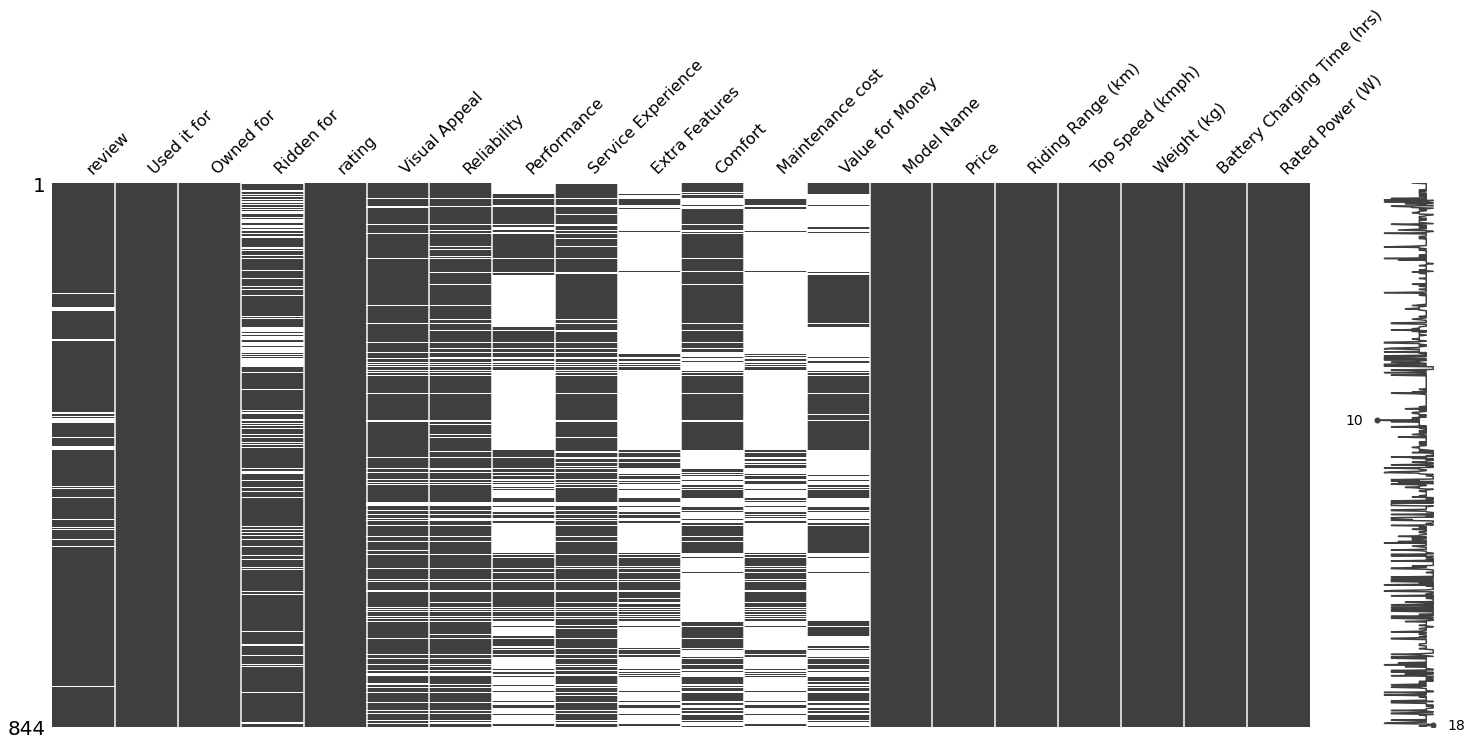

In [58]:
msno.matrix(data1)

In [59]:
((data1.isnull().sum() * 100/data1.shape[0])).sort_values(ascending = False)

Maintenance cost               78.672986
Extra Features                 78.080569
Performance                    59.123223
Value for Money                53.791469
Comfort                        37.203791
Ridden for                     20.853081
Service Experience             16.706161
Reliability                    15.165877
Visual Appeal                  12.440758
review                          5.568720
Used it for                     0.000000
rating                          0.000000
Owned for                       0.000000
Model Name                      0.000000
Price                           0.000000
Riding Range (km)               0.000000
Top Speed (kmph)                0.000000
Weight (kg)                     0.000000
Battery Charging Time (hrs)     0.000000
Rated Power (W)                 0.000000
dtype: float64

In [60]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 843
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   review                       797 non-null    object 
 1   Used it for                  844 non-null    object 
 2   Owned for                    844 non-null    object 
 3   Ridden for                   668 non-null    object 
 4   rating                       844 non-null    int64  
 5   Visual Appeal                739 non-null    float64
 6   Reliability                  716 non-null    float64
 7   Performance                  345 non-null    float64
 8   Service Experience           703 non-null    float64
 9   Extra Features               185 non-null    float64
 10  Comfort                      530 non-null    float64
 11  Maintenance cost             180 non-null    float64
 12  Value for Money              390 non-null    float64
 13  Model Name          

In [62]:
sentiments = SentimentIntensityAnalyzer()
sentiments_list = []

for review_text in data1['review']:
    if pd.isna(review_text):
        sentiments_list.append('neutral')
        continue
    sentiment_scores = sentiments.polarity_scores(review_text)

    positive_score = sentiment_scores['pos']
    negative_score = sentiment_scores['neg']

    if positive_score > negative_score:
        sentiment_label = 'positive'
    elif positive_score < negative_score:
        sentiment_label = 'negative'
    else:
        sentiment_label = 'neutral'

    sentiments_list.append(sentiment_label)
    
data1['sentiment'] = sentiments_list

In [63]:
data1['sentiment'].value_counts()

positive    527
negative    264
neutral      53
Name: sentiment, dtype: int64

In [64]:
data_segment = data1[['Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'sentiment']].copy()

In [65]:
data_segment.head()

,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,sentiment
0,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0,negative
1,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0,negative
2,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0,positive
3,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,negative
4,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0,negative


In [66]:
data1.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,...,Maintenance cost,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiment
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,...,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,...,NaN,3.0,TVS iQube,137890,100,78,117,5,3000,negative
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,...,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,positive
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,...,NaN,1.0,TVS iQube,137890,100,78,117,5,3000,negative
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,...,NaN,2.0,TVS iQube,137890,100,78,117,5,3000,negative


In [67]:
data_segment = data1.iloc[:, 5:13].copy()

In [68]:
data_segment

,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money
0,3.0,4.0,NaN,NaN,NaN,4.0,NaN,1.0
1,3.0,1.0,NaN,1.0,NaN,3.0,NaN,3.0
2,4.0,4.0,NaN,2.0,NaN,5.0,NaN,2.0
3,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0
4,3.0,4.0,NaN,1.0,NaN,3.0,NaN,2.0
...,...,...,...,...,...,...,...,...
839,2.0,2.0,NaN,2.0,NaN,2.0,NaN,3.0
840,5.0,5.0,5.0,5.0,5.0,NaN,5.0,NaN
841,2.0,2.0,4.0,2.0,3.0,NaN,1.0,NaN
842,4.0,4.0,NaN,NaN,NaN,4.0,NaN,5.0


In [69]:
data_segment = data_segment.fillna(0.)

In [70]:
data_segment.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 844 entries, 0 to 843
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Visual Appeal       844 non-null    float64
 1   Reliability         844 non-null    float64
 2   Performance         844 non-null    float64
 3   Service Experience  844 non-null    float64
 4   Extra Features      844 non-null    float64
 5   Comfort             844 non-null    float64
 6   Maintenance cost    844 non-null    float64
 7   Value for Money     844 non-null    float64
dtypes: float64(8)
memory usage: 59.3 KB


In [71]:
data_segment.mean()

Visual Appeal         3.309242
Reliability           2.811611
Performance           1.441943
Service Experience    2.619668
Extra Features        0.643365
Comfort               2.300948
Maintenance cost      0.723934
Value for Money       1.562796
dtype: float64

In [72]:
# Model

In [73]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_segment)

In [74]:
pca = PCA(random_state = 42)
pca.fit(data_scaled)

PCA(random_state=42)

In [75]:
data_pca = pca.transform(data_scaled)

In [76]:
data_pca

array([[ 0.29122665, -1.03805467,  0.35486395, ..., -0.16928653,
        -0.43801203,  0.95782684],
       [ 0.71080145, -1.39440508, -0.36046619, ..., -0.08605299,
        -0.42627866, -0.14991662],
       [-0.84914938, -1.18976544,  0.16768345, ..., -0.19190393,
        -0.32999273,  0.83073814],
       ...,
       [ 1.22821815,  1.97981462,  0.21503315, ...,  0.94790135,
        -0.65819133, -0.42143437],
       [-0.60674056, -1.68414747, -0.75218549, ..., -0.0902134 ,
        -0.75511627, -0.25471633],
       [-1.20385996, -1.36036388, -0.61627373, ..., -0.04431898,
        -0.17913074, -0.07305525]])

In [78]:
df_pca = pd.DataFrame(data_pca, columns = [f'PC{x +1}' for x in range(len(data_segment.columns))])

In [79]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,0.291227,-1.038055,0.354864,-0.623469,-1.102720,-0.169287,-0.438012,0.957827
1,0.710801,-1.394405,-0.360466,-0.621671,0.320899,-0.086053,-0.426279,-0.149917
2,-0.849149,-1.189765,0.167683,-0.410898,-0.409054,-0.191904,-0.329993,0.830738
3,1.967022,-0.878935,-0.100197,0.330003,-0.075822,0.069599,0.013068,0.011328
4,0.078940,-1.017161,-0.079210,-0.324132,-0.961554,0.005517,-0.107260,0.427972


In [80]:
pca_summary = pd.DataFrame({'Standard Deviation':df_pca.std(),
                           'Proportion of Variance': pca.explained_variance_ratio_,
                           'Cumultive Proportion': pca.explained_variance_ratio_.cumsum()})

In [81]:
pca_summary

,Standard Deviation,Proportion of Variance,Cumultive Proportion
PC1,1.845017,0.425007,0.425007
PC2,1.736646,0.376546,0.801553
PC3,0.903486,0.101915,0.903468
PC4,0.517750,0.033468,0.936936
PC5,0.405239,0.020503,0.957439
PC6,0.379558,0.017987,0.975426
PC7,0.337883,0.014254,0.989680
PC8,0.287510,0.010320,1.000000


In [82]:
factor_loadings = pd.DataFrame(pca.components_, columns = data_segment.columns, index = df_pca.columns).T

In [83]:
factor_loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
Visual Appeal,-0.480170,0.117814,0.063320,-0.730598,0.247014,0.105903,0.375474,0.067539
Reliability,-0.494758,0.124910,-0.002776,0.152447,-0.819319,0.060484,0.117211,0.166384
Performance,-0.128721,0.459145,0.574833,-0.005549,-0.019902,-0.025704,-0.288468,-0.598232
Service Experience,-0.486499,0.100691,-0.054176,0.653781,0.470391,0.052432,0.311210,-0.044129
Extra Features,-0.024373,0.519633,-0.364578,-0.023208,0.116821,0.559390,-0.456829,0.246323
Comfort,-0.418255,-0.304266,0.249807,-0.020111,0.172621,-0.296656,-0.623271,0.404238
Maintenance cost,0.005912,0.513208,-0.386495,-0.054822,0.020302,-0.762039,-0.003360,0.055435
Value for Money,-0.309572,-0.351548,-0.563840,-0.107598,-0.046688,0.009572,-0.260855,-0.617065


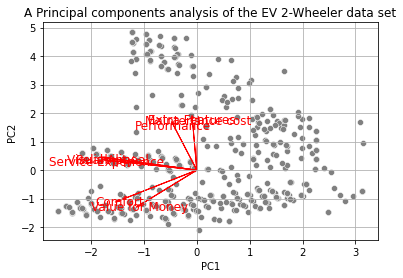

In [84]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(df_pca, x = 'PC1', y = 'PC2', color = 'grey')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text((factor_loadings['PC1'][i] * 3.5), factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('A Principal components analysis of the EV 2-Wheeler data set')
plt.grid(True)
plt.savefig("pca_2w.png", format = 'png')
plt.show()

In [85]:
data_km = [KMeans(n_clusters = k, random_state = 42).fit(data_scaled) for k in range(2, 9)]

In [86]:
data_km

[KMeans(n_clusters=2, random_state=42),
 KMeans(n_clusters=3, random_state=42),
 KMeans(n_clusters=4, random_state=42),
 KMeans(n_clusters=5, random_state=42),
 KMeans(n_clusters=6, random_state=42),
 KMeans(n_clusters=7, random_state=42),
 KMeans(random_state=42)]

In [87]:
wcss = [model.inertia_ for model in data_km]

In [88]:
wcss

[4486.215783680837,
 2505.8788898826583,
 1719.2820800833106,
 1437.8400591811587,
 1155.8511755626637,
 1052.2398418871253,
 954.3751224903352]

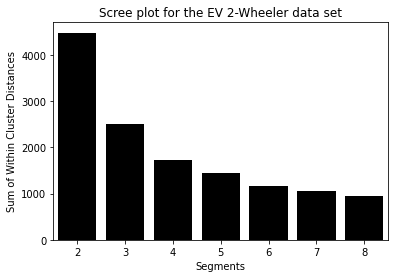

In [91]:
fig = plt.figure(figsize = (6,4))
sns.barplot(x = list(range(2, 9)), y = wcss, color = 'black')
plt.xlabel("Segments")
plt.ylabel('Sum of Within Cluster Distances')
plt.title("Scree plot for the EV 2-Wheeler data set")
plt.savefig("scree_plot.png")
plt.show()

In [92]:
wcss_diff = pd.DataFrame({'Segments':range(2,9),
                          'WCSS Difference': pd.Series(wcss).diff()})
wcss_diff['WCSS Difference'][0] = 0

C:\Users\Hp\AppData\Local\Temp\ipykernel_5100\3704507040.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  wcss_diff['WCSS Difference'][0] = 0


In [93]:
wcss_diff

,Segments,WCSS Difference
0,2,0.000000
1,3,-1980.336894
2,4,-786.596810
3,5,-281.442021
4,6,-281.988884
5,7,-103.611334
6,8,-97.864719


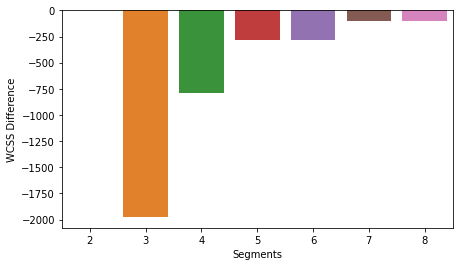

In [94]:
plt.figure(figsize = (7, 4))
sns.barplot(wcss_diff, x = 'Segments', y = 'WCSS Difference')
plt.savefig("wcss_diff.png")
plt.show()

In [ ]:
# Kmeans

In [95]:
kmeans = data_km[2]

In [96]:
kmeans

KMeans(n_clusters=4, random_state=42)

In [97]:
data_clust = pd.DataFrame(data_scaled, columns = data_segment.columns)
data_clust['cluster'] = kmeans.labels_

In [98]:
data_clust

,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,cluster
0,-0.174248,0.631486,-0.727010,-1.379209,-0.448898,0.815282,-0.472806,-0.285153,1
1,-0.174248,-0.962653,-0.727010,-0.852727,-0.448898,0.335437,-0.472806,0.728191,1
2,0.389221,0.631486,-0.727010,-0.326244,-0.448898,1.295127,-0.472806,0.221519,2
3,-1.301187,-0.962653,-0.727010,-0.852727,-0.448898,-0.624254,-0.472806,-0.285153,1
4,-0.174248,0.631486,-0.727010,-0.852727,-0.448898,0.335437,-0.472806,0.221519,2
...,...,...,...,...,...,...,...,...,...
839,-0.737717,-0.431274,-0.727010,-0.326244,-0.448898,-0.144408,-0.472806,0.728191,1
840,0.952690,1.162865,1.793928,1.253202,3.039774,-1.104099,2.792726,-0.791825,3
841,-0.737717,-0.431274,1.289740,-0.326244,1.644305,-1.104099,0.180301,-0.791825,1
842,0.389221,0.631486,-0.727010,-1.379209,-0.448898,0.815282,-0.472806,1.741535,2


In [99]:
data_pca = df_pca.copy()
data_pca['cluster'] = kmeans.labels_

In [100]:
data_pca

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,cluster
0,0.291227,-1.038055,0.354864,-0.623469,-1.102720,-0.169287,-0.438012,0.957827,1
1,0.710801,-1.394405,-0.360466,-0.621671,0.320899,-0.086053,-0.426279,-0.149917,1
2,-0.849149,-1.189765,0.167683,-0.410898,-0.409054,-0.191904,-0.329993,0.830738,2
3,1.967022,-0.878935,-0.100197,0.330003,-0.075822,0.069599,0.013068,0.011328,1
4,0.078940,-1.017161,-0.079210,-0.324132,-0.961554,0.005517,-0.107260,0.427972,2
...,...,...,...,...,...,...,...,...,...
839,0.663022,-1.195402,-0.546012,0.224861,-0.088834,0.056367,-0.112644,-0.316764,1
840,-1.224044,4.834473,-0.996547,0.174362,0.094547,0.083036,-0.136808,0.075206,3
841,1.228218,1.979815,0.215033,0.312138,0.034120,0.947901,-0.658191,-0.421434,1
842,-0.606741,-1.684147,-0.752185,-1.253207,-1.058156,-0.090213,-0.755116,-0.254716,2


In [ ]:
# Profiling Segments

In [101]:
data_profile = data_segment.copy()
data_profile['cluster'] = kmeans.labels_

In [105]:
data_profile

,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,Comfort,Maintenance cost,Value for Money,cluster
0,3.0,4.0,0.0,0.0,0.0,4.0,0.0,1.0,1
1,3.0,1.0,0.0,1.0,0.0,3.0,0.0,3.0,1
2,4.0,4.0,0.0,2.0,0.0,5.0,0.0,2.0,2
3,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1
4,3.0,4.0,0.0,1.0,0.0,3.0,0.0,2.0,2
...,...,...,...,...,...,...,...,...,...
839,2.0,2.0,0.0,2.0,0.0,2.0,0.0,3.0,1
840,5.0,5.0,5.0,5.0,5.0,0.0,5.0,0.0,3
841,2.0,2.0,4.0,2.0,3.0,0.0,1.0,0.0,1
842,4.0,4.0,0.0,0.0,0.0,4.0,0.0,5.0,2


In [102]:
columns_segment = data_clust.columns
data_pivot = data_profile[columns_segment].groupby('cluster').mean().T

In [106]:
data_pivot

cluster,0,1,2,3
Visual Appeal,4.519685,1.590909,4.339350,4.472727
Reliability,4.007874,0.851515,4.036101,4.227273
Performance,4.385827,0.554545,0.000000,4.336364
Service Experience,3.629921,0.751515,3.870036,3.909091
Extra Features,0.015748,0.339394,0.000000,3.900000
Comfort,4.133858,0.718182,4.259928,0.000000
Maintenance cost,0.000000,0.466667,0.000000,4.154545
Value for Money,0.000000,0.542424,4.115523,0.000000


In [103]:
data_pivot_mean = data_pivot.mean(axis = 1).reset_index()
data_pivot_mean.columns = ['Variable', 'Value']

In [107]:
data_pivot_mean

,Variable,Value
0,Visual Appeal,3.730668
1,Reliability,3.280691
2,Performance,2.319184
3,Service Experience,3.040141
4,Extra Features,1.063785
5,Comfort,2.277992
6,Maintenance cost,1.155303
7,Value for Money,1.164487


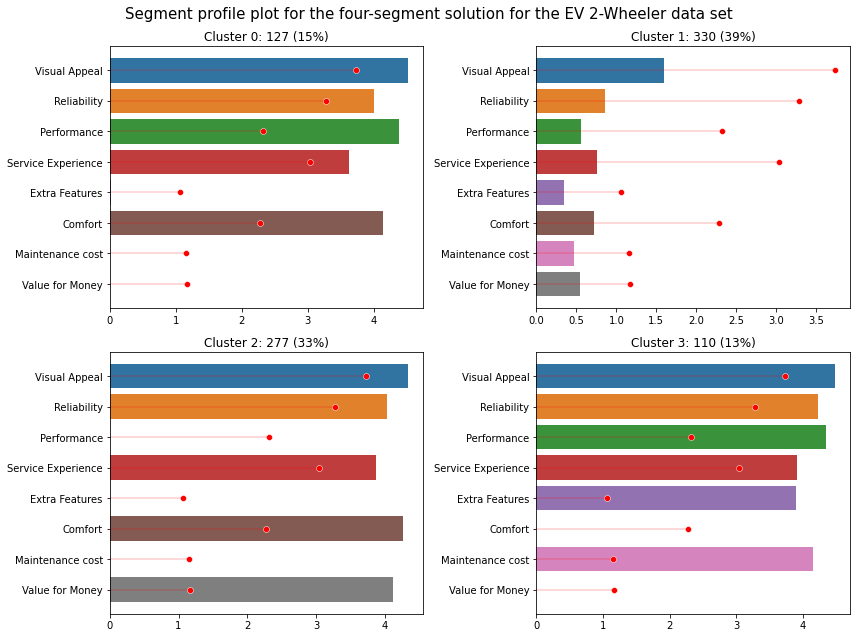

In [104]:
plt.figure(figsize = (12, 9))
for i in range(4):
    plt.subplot(2, 2, i+1)
    sns.barplot(data_pivot, x = i, y = data_pivot.index)
    sns.scatterplot(data_pivot_mean, x = 'Value', y = 'Variable', color = 'red')
    for index, row in data_pivot_mean.iterrows():
        plt.hlines(y=row['Variable'], xmin=0, xmax=row['Value'], colors='red', alpha = 0.2)
    plt.ylabel("")
    plt.xlabel("")
    plt.title(f"Cluster {i}: {data_profile['cluster'].value_counts()[i]} ({data_profile['cluster'].value_counts()[i]*100/len(data_profile):.0f}%)")
plt.suptitle("Segment profile plot for the four-segment solution for the EV 2-Wheeler data set", fontsize = 15)
plt.tight_layout()
plt.savefig("segment_profile.png")
plt.show()

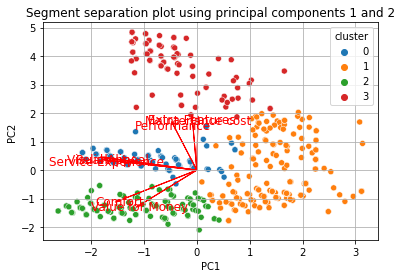

In [108]:
# Calculate centroid
index_names = factor_loadings.index

# Plot data points
sns.scatterplot(data_pca, x = 'PC1', y = 'PC2', hue = 'cluster', palette = 'tab10')

# Plot arrows from centroid to provided coordinates with index names
for i in range(len(factor_loadings['PC1'])):
    plt.arrow(0, 0, factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i] * 3.5, head_width=0.05, head_length=0.1, fc='red', ec='red')
    plt.text(factor_loadings['PC1'][i] * 3.5, factor_loadings['PC2'][i]* 3.5, index_names[i], fontsize=12, ha='center', color = 'red', va = 'center_baseline')

# Set labels and legend
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Segment separation plot using principal components 1 and 2')
plt.grid(True)
plt.savefig("segment_separation.png")
plt.show()

In [ ]:
# Describing Segments

In [109]:
data_desc = data.copy()
data_desc['cluster'] = kmeans.labels_

In [110]:
data_desc

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,...,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiment,cluster
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,...,1.0,TVS iQube,137890,100,78,117,5,3000,negative,1
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,...,3.0,TVS iQube,137890,100,78,117,5,3000,negative,1
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,...,2.0,TVS iQube,137890,100,78,117,5,3000,positive,2
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,...,1.0,TVS iQube,137890,100,78,117,5,3000,negative,1
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,...,2.0,TVS iQube,137890,100,78,117,5,3000,negative,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
839,Scooty is ok but 250 motor power is less. So t...,Daily Commute,> 1 yr,< 5000 kms,2,2.0,2.0,NaN,2.0,NaN,...,3.0,Gemopai Ryder,70821,90,25,80,4,250,positive,1
840,"Superb scooty. good look, Many color options ....",Everything,< 3 months,< 5000 kms,5,5.0,5.0,5.0,5.0,5.0,...,NaN,Gemopai Ryder,70821,90,25,80,4,250,positive,3
841,"Up to 2 years the condition was good,\nAfter 2...",Daily Commute,> 1 yr,5000-10000 kms,2,2.0,2.0,4.0,2.0,3.0,...,NaN,Gemopai Ryder,70821,90,25,80,4,250,negative,1
842,"Compare to other scooters it is a best bike, c...",Daily Commute,3-6 months,< 5000 kms,5,4.0,4.0,NaN,NaN,NaN,...,5.0,Gemopai Ryder,70821,90,25,80,4,250,positive,2


In [111]:
data_desc.columns

Index(['review', 'Used it for', 'Owned for', 'Ridden for', 'rating',
       'Visual Appeal', 'Reliability', 'Performance', 'Service Experience',
       'Extra Features', 'Comfort', 'Maintenance cost', 'Value for Money',
       'Model Name', 'Price', 'Riding Range (km)', 'Top Speed (kmph)',
       'Weight (kg)', 'Battery Charging Time (hrs)', 'Rated Power (W)',
       'sentiment', 'cluster'],
      dtype='object')

In [112]:
def mosaicplot(df, color_list, figsize=(5,5), barwidth = 1, title = "Simple Mosaic Plot", xlabel = 'cat'):
    
    fig, ax = plt.subplots(figsize =figsize)
    
    # Convert to ratio of each row sum and do a cumsum along row
    p_cnt_ratio_df = df.div(df.sum(1), axis =0)
    ratio_cum_df = p_cnt_ratio_df.cumsum(axis=1)
    
    # Get column order.
    col_order = ratio_cum_df.columns.tolist()
        
    x = [str(n) for n in ratio_cum_df.index.tolist()]
    
    # Do the actual plots
    for col, colour in zip(col_order[::-1], color_list):
        plt.bar(x, ratio_cum_df[col], color=colour, edgecolor='white', width=barwidth, label=col)
        
    # Add in legend
    plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
    

    # Configure title and axis
    plt.title(title)
    plt.xlabel("Segments")
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.yticks([])
    plt.show()

In [115]:
color_list = ['#1F77B4', '#FF7F0E', '#2CA02C', '#D62728', '#9467BD', '#8C564B', '#E377C2', '#7F7F7F']

In [116]:
color_list

['#1F77B4',
 '#FF7F0E',
 '#2CA02C',
 '#D62728',
 '#9467BD',
 '#8C564B',
 '#E377C2',
 '#7F7F7F']

In [117]:
sentiment_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['sentiment'])

In [118]:
sentiment_cluster

sentiment,negative,neutral,positive
cluster,,,
0,13,4,110
1,204,8,118
2,30,41,206
3,17,0,93


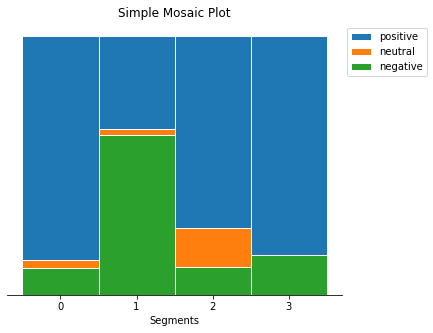

In [119]:
mosaicplot(sentiment_cluster, color_list[:3], figsize=(6,5), barwidth = 1)

In [120]:
used_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Used it for'])

In [121]:
used_cluster

Used it for,Daily Commute,Everything,Leisure Rides,Occasional Commute,Tours
cluster,,,,,
0,75,39,4,9,0
1,244,47,7,27,5
2,194,55,7,19,2
3,87,19,2,1,1


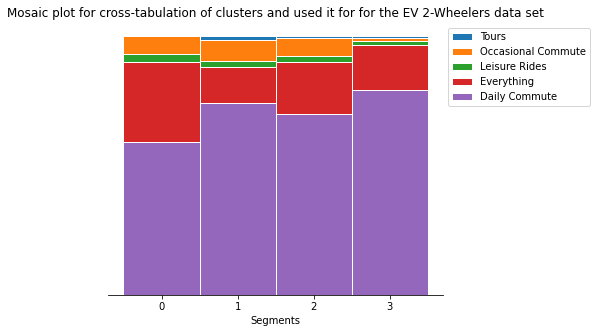

In [122]:
mosaicplot(used_cluster, color_list[:5], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and used it for for the EV 2-Wheelers data set' )

In [123]:
owned_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Owned for'])

In [124]:
owned_cluster

Owned for,3-6 months,6 months-1 yr,< 3 months,> 1 yr,Never owned,Occasional Commute
cluster,,,,,,
0,16,14,31,10,56,0
1,40,55,67,117,50,1
2,41,51,79,56,50,0
3,14,14,43,20,19,0


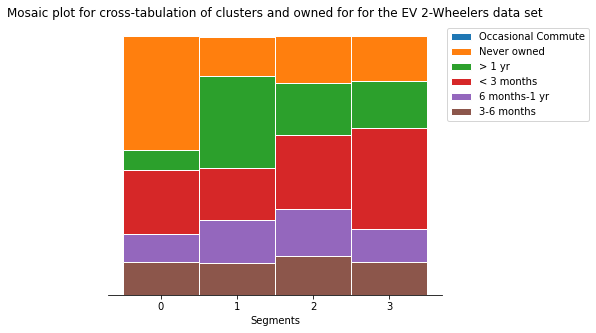

In [125]:
mosaicplot(owned_cluster, color_list[:6], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and owned for for the EV 2-Wheelers data set' )

In [126]:
ridden_cluster = pd.crosstab(index = data_desc['cluster'], columns = data_desc['Ridden for'])

In [127]:
ridden_cluster

Ridden for,10000-15000 kms,5000-10000 kms,< 5000 kms,> 15000 kms,Never owned
cluster,,,,,
0,1,15,54,1,0
1,15,61,184,18,1
2,11,44,158,14,0
3,5,18,63,5,0


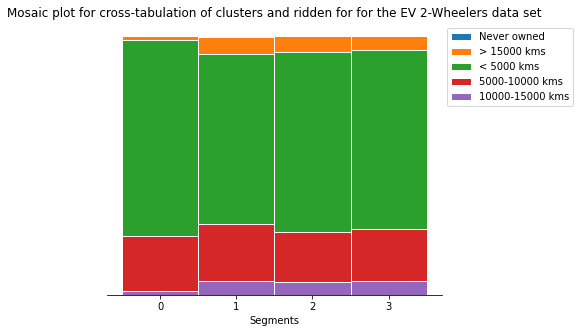

In [128]:
mosaicplot(ridden_cluster, color_list[:5], figsize=(6,5), barwidth = 1, title = 'Mosaic plot for cross-tabulation of clusters and ridden for for the EV 2-Wheelers data set' )

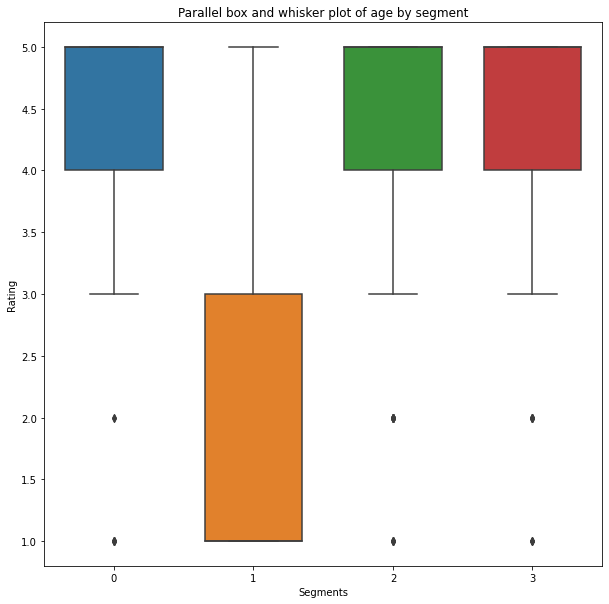

In [130]:
# Number of cluster along the x-axis and rating along the y-axis
plt.figure(figsize = (10,10))
sns.boxplot(data_desc, x= 'cluster', y = 'rating', palette = 'tab10', width = 0.7)
plt.xlabel("Segments")
plt.ylabel("Rating")
plt.title("Parallel box and whisker plot of age by segment")
plt.savefig("rating.png")
plt.show()


In [131]:
data_desc.head()

,review,Used it for,Owned for,Ridden for,rating,Visual Appeal,Reliability,Performance,Service Experience,Extra Features,...,Value for Money,Model Name,Price,Riding Range (km),Top Speed (kmph),Weight (kg),Battery Charging Time (hrs),Rated Power (W),sentiment,cluster
0,We all checked the bike's capacity to be 150 k...,Daily Commute,Never owned,NaN,1,3.0,4.0,NaN,NaN,NaN,...,1.0,TVS iQube,137890,100,78,117,5,3000,negative,1
1,Performance is very poor on this bike. The cha...,Everything,> 1 yr,< 5000 kms,1,3.0,1.0,NaN,1.0,NaN,...,3.0,TVS iQube,137890,100,78,117,5,3000,negative,1
2,I purchased this in April 2022 and the sales s...,Daily Commute,< 3 months,< 5000 kms,3,4.0,4.0,NaN,2.0,NaN,...,2.0,TVS iQube,137890,100,78,117,5,3000,positive,2
3,If any issues come in scooty parts not availab...,Daily Commute,6 months-1 yr,5000-10000 kms,1,1.0,1.0,NaN,1.0,NaN,...,1.0,TVS iQube,137890,100,78,117,5,3000,negative,1
4,Don't buy this vehicle unless you have a near ...,Daily Commute,6 months-1 yr,< 5000 kms,1,3.0,4.0,NaN,1.0,NaN,...,2.0,TVS iQube,137890,100,78,117,5,3000,negative,2


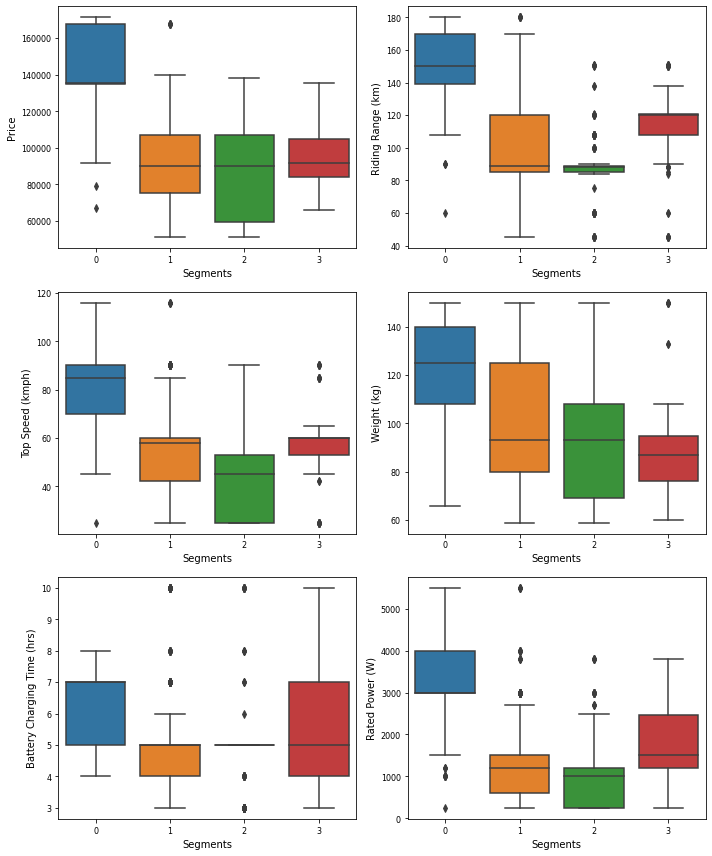

In [132]:
plt.figure(figsize = (10, 12))
for i, col in enumerate(data_desc.columns[-8:-2]):
    plt.subplot(3, 2, i+1)
    sns.boxplot(data_desc, x = 'cluster', y =col)
    plt.xlabel("Segments", fontsize= 10)
    plt.ylabel(col, fontsize = 10)
    plt.xticks(fontsize = 8)
    plt.yticks(fontsize = 8)
plt.tight_layout()
plt.show()

# Conclusion